In [51]:
# libraries used

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import datetime

%matplotlib inline

# needed for treemap graphic
!pip install squarify 
import squarify

print("loaded libraries")

loaded libraries


In [0]:
# load up csv files

github_url = "https://raw.githubusercontent.com/werntzp/hockey-stats/master/"

df_games = pd.read_csv(github_url + "games.csv") 
df_shots = pd.read_csv(github_url + "shots.csv") 
df_goals = pd.read_csv(github_url + "goals.csv") 
df_periods = pd.read_csv(github_url + "periods.csv")
df_penalties = pd.read_csv(github_url + "penalties.csv") 

print("loaded csv files")

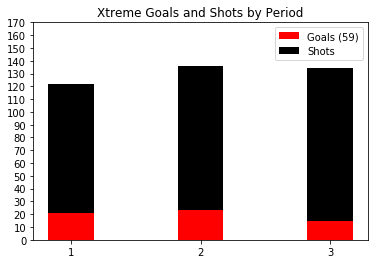

In [3]:
# stacked bar chart showing Xtreme goals/shots by period

p1g = df_goals[(df_goals.team == "a") & (df_goals.period == 1)].shape[0]
p2g = df_goals[(df_goals.team == "a") & (df_goals.period == 2)].shape[0]
p3g = df_goals[(df_goals.team == "a") & (df_goals.period == 3)].shape[0]
p1s = df_shots['ashburn_p1'].sum()
p2s = df_shots['ashburn_p2'].sum()
p3s = df_shots['ashburn_p3'].sum()

N = 3
goals = (p1g, p2g, p3g)
shots = (p1s, p2s, p3s)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

g_label = "Goals (" + str(p1g + p2g + p3g) + ")"

p1 = plt.bar(ind, goals, width, color='red')
p2 = plt.bar(ind, shots, width, bottom=goals, color='black')

plt.title('Xtreme Goals and Shots by Period')
plt.xticks(ind, ('1', '2', '3'))
plt.yticks(np.arange(0, 175, 10))
plt.legend((p1[0], p2[0]), (g_label, 'Shots'))

plt.show()

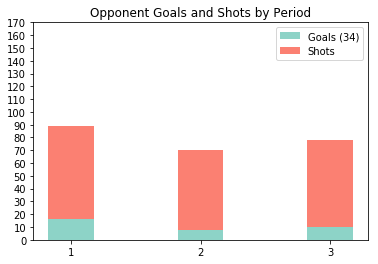

In [4]:
# stacked bar chart showing opponent goals/shots by period

p1g = df_goals[(df_goals.team == "o") & (df_goals.period == 1)].shape[0]
p2g = df_goals[(df_goals.team == "o") & (df_goals.period == 2)].shape[0]
p3g = df_goals[(df_goals.team == "o") & (df_goals.period == 3)].shape[0]
p1s = df_shots['opp_p1'].sum()
p2s = df_shots['opp_p2'].sum()
p3s = df_shots['opp_p3'].sum()

N = 3
goals = (p1g, p2g, p3g)
shots = (p1s, p2s, p3s)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

g_label = "Goals (" + str(p1g + p2g + p3g) + ")"

p1 = plt.bar(ind, goals, width, color='#8dd3c7')
p2 = plt.bar(ind, shots, width, bottom=goals, color='#fb8072')

plt.title('Opponent Goals and Shots by Period')
plt.xticks(ind, ('1', '2', '3'))
plt.yticks(np.arange(0, 175, 10))
plt.legend((p1[0], p2[0]), (g_label, 'Shots'))

plt.show()

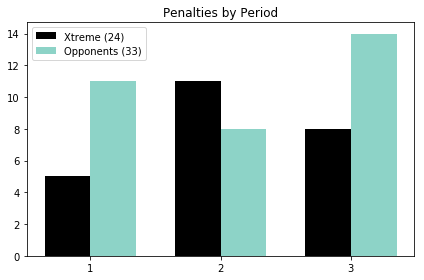

In [5]:
# bar chart comparing xtreme and opponent penalties by period

p1xp = df_penalties[(df_penalties.team == "a") & (df_penalties.period == 1)].shape[0]
p2xp = df_penalties[(df_penalties.team == "a") & (df_penalties.period == 2)].shape[0]
p3xp = df_penalties[(df_penalties.team == "a") & (df_penalties.period == 3)].shape[0]
p1op = df_penalties[(df_penalties.team == "o") & (df_penalties.period == 1)].shape[0]
p2op = df_penalties[(df_penalties.team == "o") & (df_penalties.period == 2)].shape[0]
p3op = df_penalties[(df_penalties.team == "o") & (df_penalties.period == 3)].shape[0]

labels = ['1', '2', '3']
xtreme = [p1xp, p2xp, p3xp]
opponent = [p1op, p2op, p3op]

x_label = "Xtreme (" + str(p1xp + p2xp + p3xp) + ")"
o_label = "Opponents (" + str(p1op + p2op + p3op) + ")"


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, xtreme, width, label=x_label, color='black')
rects2 = ax.bar(x + width/2, opponent, width, label=o_label, color='#8dd3c7')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Penalties by Period')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.yticks(np.arange(0, 15, 2))

plt.show()

In [6]:
# treemap with penalty types 

fig = go.Figure()

x = 0.
y = 0.
width = 100.
height = 100.

# get unique list of xtreme penalty types
dfx = df_penalties[(df_penalties.team == "a")]
arr = dfx.type.unique()

p_values = []
p_labels = []

# loop through names and count up number of times they occured
for p in arr:
  c = dfx[(dfx.type == p)].shape[0]
  p_values.append(c)
  p_labels.append(p + " (" + str(c) + ")")

normed = squarify.normalize_sizes(p_values, width, height)
rects = squarify.squarify(normed, x, y, width, height)

# Choose colors from http://colorbrewer2.org/ under "Export"
color_brewer = ['rgb(141,211,199)','rgb(255,255,179)','rgb(190,186,218)','rgb(251,128,114)','rgb(128,177,211)','rgb(253,180,98)','rgb(179,222,105)','rgb(252,205,229)']

# other colors if have more than 8 penalty types ... rgb(217,217,217), rgb(188,128,189), rgb(204,235,197)

shapes = []
annotations = []
counter = 0

for r, val, color, lbl in zip(rects, p_values, color_brewer, p_labels):
    shapes.append(
        dict(
            type = 'rect',
            x0 = r['x'],
            y0 = r['y'],
            x1 = r['x']+r['dx'],
            y1 = r['y']+r['dy'],
            line = dict( width = 2 ),
            fillcolor = color
        )
    )
    annotations.append(
        dict(
            x = r['x']+(r['dx']/2),
            y = r['y']+(r['dy']/2),
            text = lbl,
            showarrow = False
        )
    )

# For hover text
fig.add_trace(go.Scatter(
    x = [ r['x']+(r['dx']/2) for r in rects ],
    y = [ r['y']+(r['dy']/2) for r in rects ],
    text = [ str(v) for v in p_values ],
    mode = 'text',
))

fig.update_layout(
    height=700,
    width=700,
    xaxis=dict(showgrid=False,zeroline=False,showticklabels=False),
    yaxis=dict(showgrid=False,zeroline=False,showticklabels=False),
    shapes=shapes,
    annotations=annotations,
    hovermode='closest',
    title=go.layout.Title(
        text="Xtreme Penalty Types",
        xref="paper",
        x=0
    )
)

fig.show()

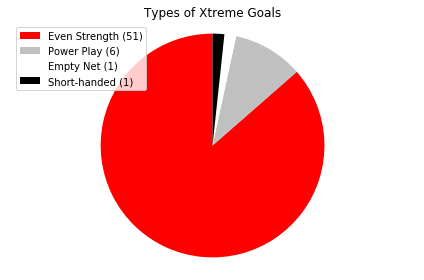

In [7]:
# Pie chart with goal types

# dictionary with goal types 
goal_types = {"en": "Empty Net", "es": "Even Strength", "pp": "Power Play", "ps": "Penalty shot", "sh": "Short-handed" }

# get unique list of goal types 
dfx = df_goals[(df_goals.team == "a")]
arr = dfx.type.unique()

g_values = []
g_labels = []

for g in arr:
  c = dfx[(dfx.type == g)].shape[0]
  g_values.append(c)
  g_labels.append(goal_types[g] + " (" + str(c) + ")")

#colors
colors = ['#ff0000','#c0c0c0','#ffffff','#000000']

fig1, ax1 = plt.subplots()
#patches, texts, autotexts = ax1.pie(g_values, colors = colors, autopct='%1.0f%%', pctdistance=1.08, startangle=90)
patches, texts = ax1.pie(g_values, colors = colors, pctdistance=1.08, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.legend(patches, g_labels, loc="best")
ax1.axis('equal')  
ax1.set_title('Types of Xtreme Goals')
plt.tight_layout()
plt.show()

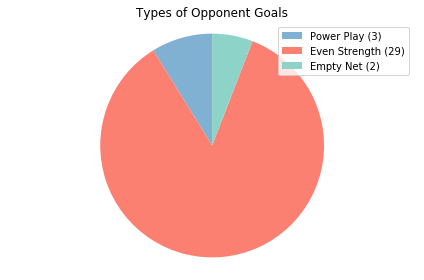

In [8]:
# Pie chart with goal types

# dictionary with goal types 
#goal_types = {"en": "Empty Net", "es": "Even Strength", "pp": "Power Play", "ps": "Penalty shot", "sh": "Short-handed" }

# get unique list of goal types 
dfx = df_goals[(df_goals.team == "o")]
arr = dfx.type.unique()

g_values = []
g_labels = []

for g in arr:
  c = dfx[(dfx.type == g)].shape[0]
  g_values.append(c)
  g_labels.append(goal_types[g] + " (" + str(c) + ")")

#colors
colors = ['#80b1d3','#fb8072','#8dd3c7','#fccde5']

fig1, ax1 = plt.subplots()
#patches, texts, autotexts = ax1.pie(g_values, colors = colors, autopct='%1.0f%%', pctdistance=1.08, startangle=90)
patches, texts = ax1.pie(g_values, colors = colors, pctdistance=1.08, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.legend(patches, g_labels, loc="best")
ax1.axis('equal')  
ax1.set_title('Types of Opponent Goals')
plt.tight_layout()
plt.show()

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from datetime import datetime

%matplotlib inline


names = ['Ashburn goal', 'Ashburn goal', 'Ashburn goal', 'Ashburn penalty', 'Ashburn penalty', 
        'Hollydell goal', 'Hollydell goal', 'Hollydell penalty', 'Period 2',
        'Ashburn penalty', 'Ashburn goal', 'Hollydell goal', 'Ashburn goal', 'Period 3', 'Ashburn goal']

dates = ['2019-01-01', '2019-01-03', '2019-01-04', '2019-01-05',
             '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-13',
             '2019-01-16', '2019-01-18', '2019-01-22', '2019-01-23',
             '2019-01-26', '2019-01-31', '2019-03-01']

# Convert date strings (e.g. 2014-10-18) to datetime
dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates]
    
# Choose some nice levels
levels = np.tile([-5, 5, -3, 3, -1, 1],
                 int(np.ceil(len(dates)/6)))[:len(dates)]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(8.8, 4), constrained_layout=True)
ax.set(title="Game 1 Timeline")

markerline, stemline, baseline = ax.stem(dates, levels, linefmt="C3-", basefmt="k-")

plt.setp(markerline, mec="k", mfc="w", zorder=3)

# Shift the markers to the baseline by replacing the y-data by zeros.
markerline.set_ydata(np.zeros(len(dates)))

# annotate lines
vert = np.array(['top', 'bottom'])[(levels > 0).astype(int)]
for d, l, r, va in zip(dates, levels, names, vert):
    ax.annotate(r, xy=(d, l), xytext=(-3, np.sign(l)*3),
                textcoords="offset points", va=va, ha="right")

# format xaxis with 4 month intervals
#ax.get_xaxis().set_major_locator(mdates.MonthLocator(interval=4))
#ax.get_xaxis().set_major_formatter(mdates.DateFormatter("%b %Y"))
#plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

# remove y axis and spines
ax.get_yaxis().set_visible(False)
for spine in ["left", "top", "right"]:
    ax.spines[spine].set_visible(False)

ax.margins(y=0.1)
plt.axis('off')
plt.show()    
    

In [9]:
# calculate how many times Xtreme scored first 

dfx = pd.DataFrame(columns=["game",	"team",	"period",	"time",	"type"])

for g in range(1,12):
    t = df_goals[(df_goals.game == g)].head(1)
    dfx = pd.concat([t, dfx[:]])
    
print("The Xtreme have scored first in " + str(dfx[(dfx.team == "a")].shape[0]) + " games.")


The Xtreme have scored first in 8 games.


In [10]:
# calculate power play percentage (calculated by dividing power play goals by power play opportunities)

ppg = df_goals[(df_goals.team == "a") & (df_goals.type == "pp")].shape[0]
ppo = df_penalties[(df_penalties.team == "o")].shape[0]
pp = '{0:.2f}'.format((ppg / ppo * 100))
print("Power play percentage is " + str(pp) + "%.")


Power play percentage is 18.18%.


In [11]:
# calculate penalty kill percentage (calculated by subtracting power play goals against from power 
#play opportunities against, then dividing by power play opportunities against.)

ppg = df_goals[(df_goals.team == "o") & (df_goals.type == "pp")].shape[0]
ppo = df_penalties[(df_penalties.team == "a")].shape[0]
pp = '{0:.2f}'.format(((ppo - ppg) / ppo * 100))
print("Penalty kill percentage is " + str(pp) + "%.")


Penalty kill percentage is 87.50%.


In [12]:
# calculate how many periods xtreme have scored in 

num_games = df_games.shape[0]

periods_scored = 0 
for g in range(1,num_games+1): 
  dfx = df_goals[(df_goals.game == g) & (df_goals.team == "a")]
  periods = dfx["period"].unique().size
  periods_scored = periods_scored + periods

# count # periods where > 0 
total_periods = 0 
for p in range(1,5):
    period_num = "p" + str(p) + "_length"
    series = df_periods.apply(lambda x: True if x[period_num] > 0 else False , axis=1)
    total_periods = total_periods + len(series[series == True].index)

print("The Xtreme have scored in " + str(periods_scored) + " out of " + str(total_periods) + " periods.")


The Xtreme have scored in 29 out of 39 periods.


In [55]:
# calculate when we give up a goal within 1 minute or 2 of scoring one 
# find an xtreme goal, see if next one is opponent, then subtract time? 

# use a counter
ctr = 0 

# use one minute as threshold
threshold = datetime.timedelta(minutes=1)

# get all xtreme goals 
dfx = df_goals[(df_goals.team == "a")]

# loop through each one
for x in range(1, dfx.shape[0]+1):
    try: 
        # current goal is ashburn
        curr_goal = dfx.iloc[x]
        # next goal is whatever the next one is 
        next_goal = df_goals.iloc[curr_goal.name+1]
        # need to verify next goal occured in the same game, same period, and was scored by opponet
        if ((next_goal[0] == curr_goal[0]) & (next_goal[1] == "o") & (next_goal[2] == curr_goal[2])):
            # now, grab time of ashburn goal and opponent goal 
            [x1_min, x1_sec] = [int(x) for x in curr_goal[3].split(':')]
            a_goal_time = datetime.timedelta(minutes=x1_min, seconds=x1_sec)
            [x2_min, x2_sec] = [int(x) for x in next_goal[3].split(':')]
            o_goal_time = datetime.timedelta(minutes=x2_min, seconds=x2_sec)
            # subtract to get time differential and see if below the threshold
            time_diff = a_goal_time - o_goal_time
            if (time_diff < threshold):
              #print(next_goal)
              # increment the counter
              ctr = ctr + 1
    except:
        print("")
        
#print out the result
print("Opponents have sored " + str(ctr) + " times within one minute of the Xtreme scoring a goal.")




Opponents have sored 8 times within one minute of the Xtreme scoring a goal.


In [50]:
import datetime
x1 = "00:30"
x2 = "00:06"


if (time_diff < threshold):
  print("goal scored in under 2 minutes!")
  

goal scored in under 2 minutes!
